In [17]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph
import ipywidgets
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import random
import bisect
import copy

In [45]:
def homophilic_ba_graph(N, m , minority_fraction, homophily):
    """Return homophilic random graph using BA preferential attachment model.

    A graph of n nodes is grown by attaching new nodes each with m
    edges that are preferentially attached to existing nodes with high
    degree. The connections are established by linking probability which
    depends on the connectivity of sites and the homophily(similarities).
    homophily varies ranges from 0 to 1.

    Parameters
    ----------
    N : int
        Number of nodes
    m : int
        Number of edges to attach from a new node to existing nodes
    seed : int, optional
        Seed for random number generator (default=None).

    minority_fraction : float
        fraction of minorities in the network

    homophily: float
        value between 0 to 1. similarity between nodes. if nodes have same attribute
        their homophily (distance) is smaller.

    Returns
    -------
    G : Graph

    Notes
    -----
    The initialization is a graph with with m nodes and no edges.

    References
    ----------
    .. [1] A. L. Barabasi and R. Albert "Emergence of scaling in
       random networks", Science 286, pp 509-512, 1999.
    """

    G = nx.Graph()

    minority = int(minority_fraction * N)

    minority_nodes = set(random.sample(range(N),minority))
    minority_mask = [node in minority_nodes for node in range(N)]
    G.add_nodes_from([(node, {"color": "red" if node in minority_nodes else "blue"})\
        for node in range(N)])
    target_list=list(range(m))
    source = m #start with m nodes

    while source < N:
        print("Current target List length")
        print(len(target_list))
        print(target_list)
        targets = _pick_targets(G,source,target_list,minority_mask,homophily,m)
        print(targets)
        if targets != set(): #if the node does  find the neighbor
            G.add_edges_from(zip([source]*m,targets))

        target_list.append(source)
        print("target_list (origional call):",target_list)

        source += 1

        color = nx.get_node_attributes(G, 'color')
        d = dict(G.degree)
        pos = nx.spring_layout(G, k=0.25)
        plt.figure(figsize=(6, 6))
        nx.draw_networkx_edges(G, pos=pos, alpha=0.4)
        nx.draw_networkx_nodes(
            G, pos=pos, nodelist=color.keys(),
            node_size=[v*30 for v in d.values()],
            node_color=list(color.values()),
            cmap=plt.cm.Reds_r
        )
        labels = {node: rf"{node}" for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color="whitesmoke")
        plt.axis('off')
        plt.show()

    return G


def _pick_targets(G,source,target_list,minority_mask,homophily,m):

    target_prob_dict = {}
    for target in target_list:
        target_prob = homophily if minority_mask[source] == minority_mask[target] else 1 - homophily
        target_prob *= (G.degree(target)+0.00001)
        target_prob_dict[target] = target_prob

    prob_sum = sum(target_prob_dict.values())

    targets = set()
    target_list_copy = copy.copy(target_list)
    count_looking = 0
    if prob_sum == 0:
        return targets #it returns an empty set

    while len(targets) < m:
        count_looking += 1
        if count_looking > len(G): # if node fails to find target
            break
        rand_num = random.random()
        cumsum = 0.0
        for k in target_list_copy:
            print("target_list_copy:",target_list_copy)
            print("target_list:",target_list)
            print("target_prob_dict",target_prob_dict)
            print("prob_sum",prob_sum)
            cumsum += float(target_prob_dict[k]) / prob_sum # this it updated each iteration
            print("probability of adding node",k,"is cumulative sum:",cumsum)
            print("rand=",rand_num)
            if rand_num < cumsum:
                targets.add(k)
                target_list_copy.remove(k)
                print("EdgeAdded")
                break
    return targets

In [46]:
def network(nodes, new_edges, minority, homophily):
    G = homophilic_ba_graph(N=nodes, m=new_edges, minority_fraction=minority, homophily=homophily)
    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    pos = nx.spring_layout(G, k=0.25)
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_edges(G, pos=pos, alpha=0.4)
    nx.draw_networkx_nodes(
        G, pos=pos, nodelist=color.keys(),
        node_size=[v*15 for v in d.values()],
        node_color=list(color.values()),
        cmap=plt.cm.Reds_r
    )
    plt.axis('off')
    plt.show()

Current target List length
2
[0, 1]
cumsum
0.5
cumsum
0.5
cumsum
0.5
{0, 1}


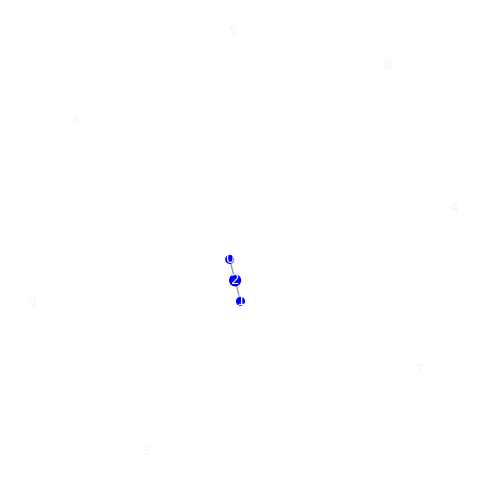

Current target List length
3
[0, 1, 2]
cumsum
0.25000062499531256
cumsum
0.25000062499531256
cumsum
0.49999875000937494
cumsum
0.25000062499531256
cumsum
0.49999875000937494
cumsum
0.25000062499531256
cumsum
0.49999875000937494
{0, 2}


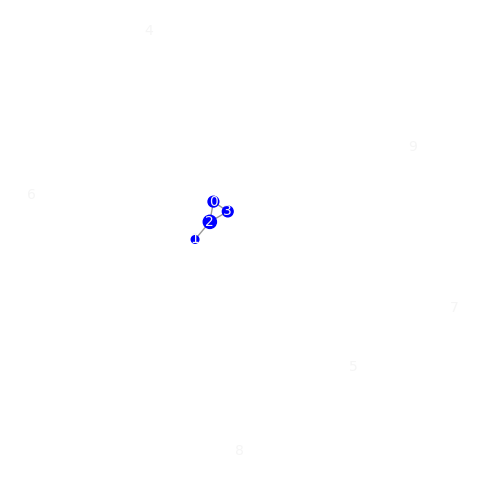

Current target List length
4
[0, 1, 2, 3]
cumsum
0.25
cumsum
0.125000624996875
cumsum
0.37499937500312497
{0, 2}


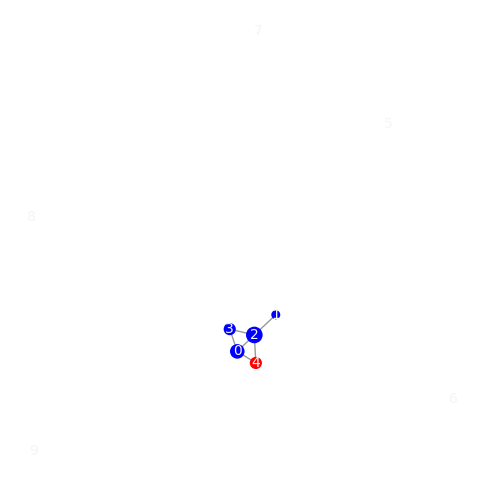

Current target List length
5
[0, 1, 2, 3, 4]
cumsum
0.16666648148230453
cumsum
0.05555586419615913
cumsum
0.2222217901253772
cumsum
0.11111117283923183
cumsum
0.16666648148230453
cumsum
0.05555586419615913
cumsum
0.2222217901253772
cumsum
0.4444446913569273
cumsum
0.16666648148230453
cumsum
0.05555586419615913
cumsum
0.2222217901253772
cumsum
0.4444446913569273
{3, 4}


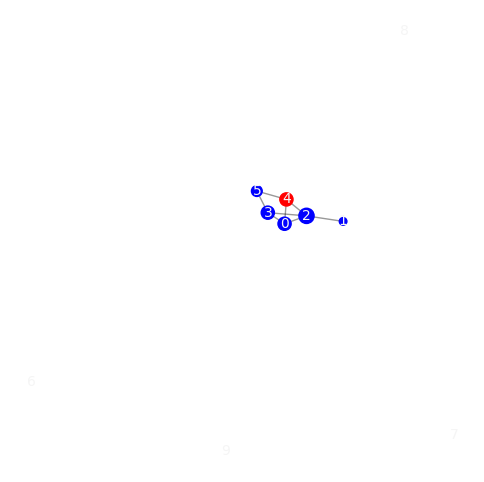

Current target List length
6
[0, 1, 2, 3, 4, 5]
cumsum
0.11999996800011521
cumsum
0.04000025599907841
cumsum
0.1599998240006336
cumsum
0.11999996800011521
cumsum
0.47999987200046085
cumsum
0.0800001119995968
cumsum
0.11999996800011521
cumsum
0.04000025599907841
cumsum
0.1599998240006336
cumsum
0.11999996800011521
cumsum
0.47999987200046085
{4, 5}


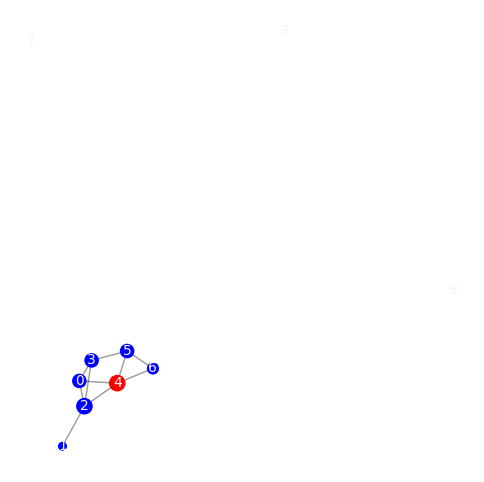

Current target List length
7
[0, 1, 2, 3, 4, 5, 6]
cumsum
0.17647052768188354
cumsum
0.05882390138271551
cumsum
0.17647052768188354
{0, 1}


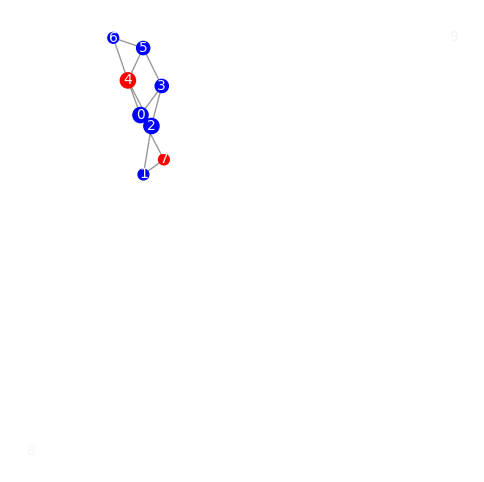

Current target List length
8
[0, 1, 2, 3, 4, 5, 6, 7]
cumsum
0.09523801587328043
cumsum
0.04761912698386244
cumsum
0.09523801587328043
cumsum
0.07142857142857144
cumsum
0.3809520634931217
cumsum
0.07142857142857144
cumsum
0.09523801587328043
cumsum
0.04761912698386244
cumsum
0.09523801587328043
cumsum
0.07142857142857144
{3, 5}


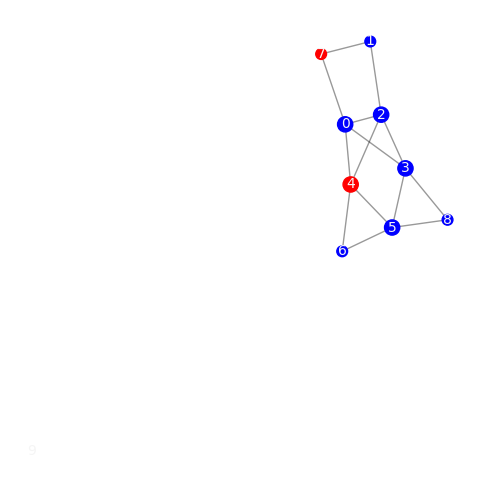

Current target List length
9
[0, 1, 2, 3, 4, 5, 6, 7, 8]
cumsum
0.08695645557677528
cumsum
0.043478336483685376
cumsum
0.08695645557677528
cumsum
0.08695645557677528
cumsum
0.34782582230710113
cumsum
0.08695645557677528
cumsum
0.08695645557677528
cumsum
0.043478336483685376
cumsum
0.08695645557677528
cumsum
0.08695645557677528
cumsum
0.34782582230710113
{4, 5}


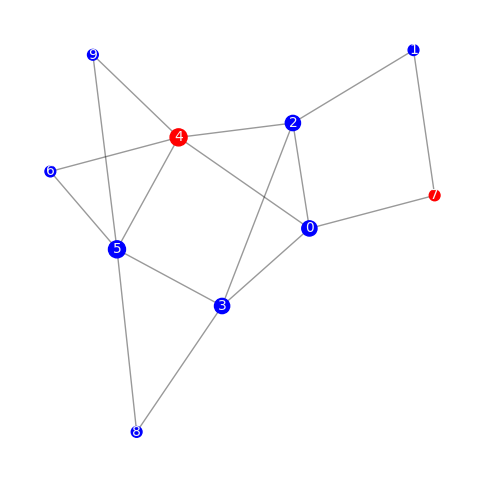

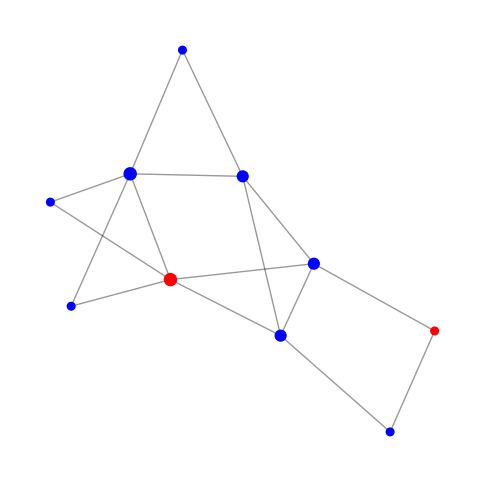

In [47]:
# graph = homophilic_ba_graph(N = 10, m = 2 , minority_fraction = 0.2, homophily= 1)
network(10,2,0.2,0.2)
